In [1]:
# Dataset link
# https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset 

In [2]:
import numpy as np   # linear algebra
import pandas as pd  # data processing
import warnings      # warning filter


#plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

**Import data**

In [3]:
# training set
df_train = pd.read_csv("/content/drive/MyDrive/projects real/loan approval prediction/train.csv")

# testing set
df_test = pd.read_csv("/content/drive/MyDrive/projects real/loan approval prediction/test.csv")

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Size of each data set:

In [6]:
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


preprocessing of the training dataset.

In [7]:
#column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#summary statistics
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#the Id column is not needed, let's drop it for both test and train datasets
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)

#checking the new shapes
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


**Missing values**

In [10]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [11]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Each value will be replaced by the most frequent value (mode).

In [12]:
#filling the missing data

for col in df_train:
  df_train[col].fillna(df_train[col].dropna().mode()[0] , inplace = True)

In [13]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
for col in df_test:
  df_test[col].fillna(df_test[col].dropna().mode()[0] , inplace = True)

**Data visalization**

In [15]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()

#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  df_train[num]
#categoric df
loan_cat =  df_train[cat]

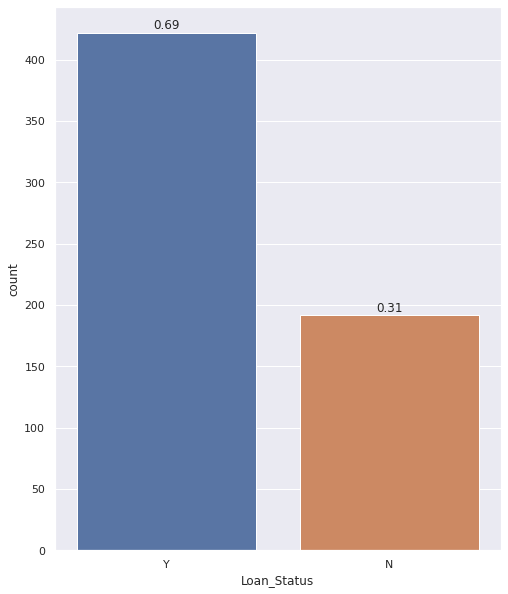

In [16]:
total = float(len(df_train[cat[-1]]))

plt.figure(figsize=(8,10))

ax = sns.countplot(df_train[cat[-1]])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

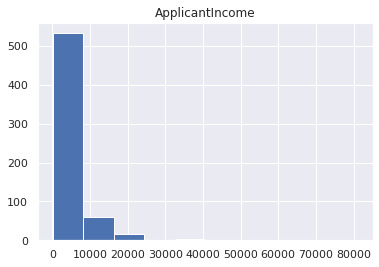

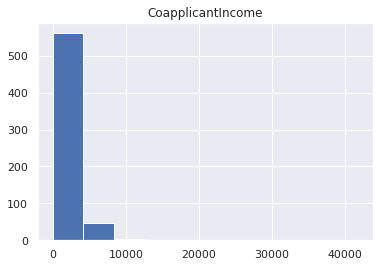

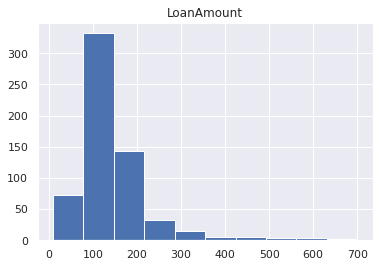

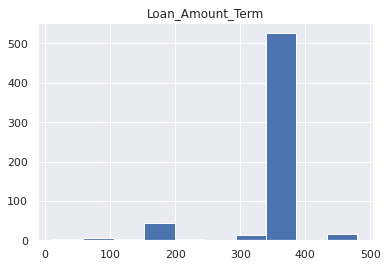

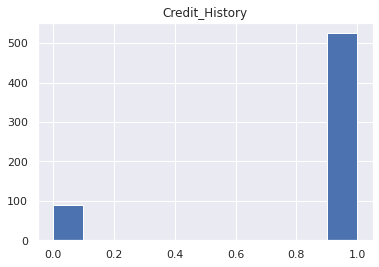

In [17]:
# Numeric
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

Categorical (split by Loan status):

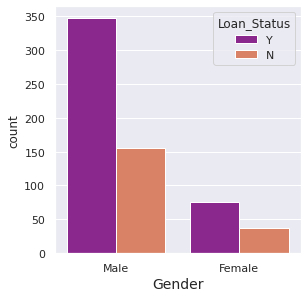

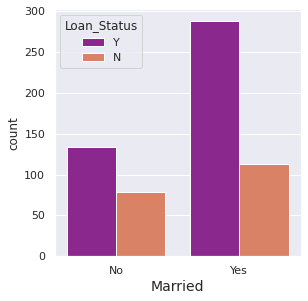

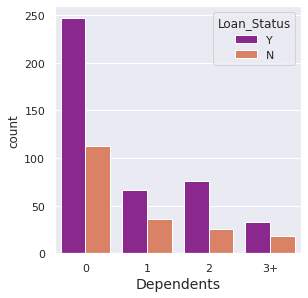

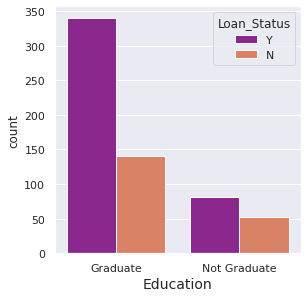

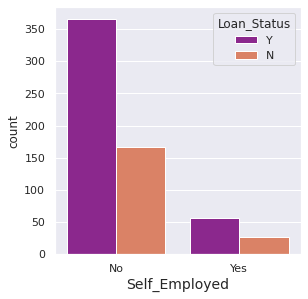

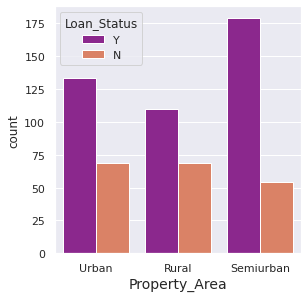

In [18]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df_train ,palette='plasma')
    plt.xlabel(i, fontsize=14)

**Encoding data to numeric**

In [19]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

# dropping the previous Dependents column
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {df_train.shape}\n\ntesting set (row, col): {df_test.shape}\n")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)



Correlation matrix

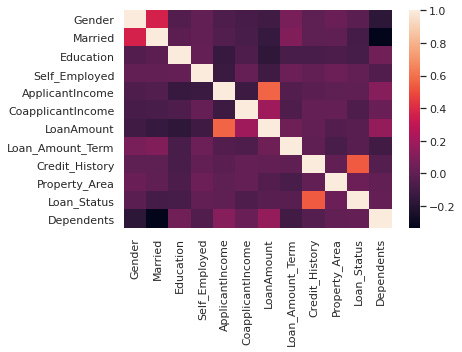

In [20]:
#plotting the correlation matrix

sns.heatmap(df_train.corr())

Correlation table for a more detailed analysis:

In [21]:
#correlation table
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.

**Machine learning models**

*   XGBoost
*   Logistic Regression
*   Decision Tree
*   Random Forest




**The Process of Modeling the Data:**

1.   Importing the model
2.   Fitting the model
3.   Predicting Loan Status
4.   Classification report by Loan Status
5.   Overall accuracy

In [22]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:

X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
90,1,1,1,2,2958,2900.0,131.0,360.0,1.0,2,0
533,1,2,1,2,11250,0.0,196.0,360.0,1.0,2,1
452,1,1,1,2,3948,1733.0,149.0,360.0,0.0,1,0
355,2,2,1,2,3813,0.0,116.0,180.0,1.0,3,0
266,1,1,1,2,4708,1387.0,150.0,360.0,1.0,2,2


In [24]:
X_train.dtypes

Gender                 int64
Married                int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Dependents             int64
dtype: object

In [25]:
y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int64

**Decision Tree**

In [26]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.43      0.58      0.49        33
           1       0.82      0.72      0.77        90

    accuracy                           0.68       123
   macro avg       0.63      0.65      0.63       123
weighted avg       0.72      0.68      0.70       123

68.29% Accurate


**Random Forest**

In [27]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123

78.05% Accurate


**XGBoost**

In [28]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

83.74% Accurate


**Logistic Regression**

In [29]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
lr = accuracy_score(y_predict,y_test)
print(f"{round(lr*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

83.74% Accurate


**Conclusion**

1. Credit_History is a very important variable because of its high correlation with Loan_Status therefor showind high Dependancy for the latter.

2. The Logistic Regression algorithm is the most accurate: approximately 83%.

In [30]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]

Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})

Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,XGBoost,0.837398
3,Logistic Regression,0.837398
1,Random Forest,0.780488
0,Decision Tree,0.682927


In [31]:
# saving the logistic regression model
import pickle

logi_model_path = "log_reg.pkl"

with open(logi_model_path, 'wb') as file:
    pickle.dump(LR, file)